<a href="https://colab.research.google.com/github/Sbilalahmad/AI_ML_mentorship/blob/main/Crop_Yeild_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "yield_df.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "patelris/crop-yield-prediction-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-965618143.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'crop-yield-prediction-dataset' dataset.
First 5 records:    Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [ ]:
df.describe()

,Unnamed: 0,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,14120.500000,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,8152.907488,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,0.000000,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,7060.250000,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,14120.500000,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,21180.750000,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,28241.000000,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(2310)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
dfc=df.drop(['Area','Item'],axis=1)
dfc.corr().style.background_gradient(cmap='coolwarm')

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Year,1.000000,0.091327,-0.006423,0.135127,0.013701
hg/ha_yield,0.091327,1.000000,-0.004067,0.065523,-0.110400
average_rain_fall_mm_per_year,-0.006423,-0.004067,1.000000,0.161483,0.333694
pesticides_tonnes,0.135127,0.065523,0.161483,1.000000,0.045577
avg_temp,0.013701,-0.110400,0.333694,0.045577,1.000000


In [ ]:
df['average_rain_fall_mm_per_year']

,average_rain_fall_mm_per_year
0,1485.0
1,1485.0
2,1485.0
3,1485.0
4,1485.0
...,...
28237,657.0
28238,657.0
28239,657.0
28240,657.0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-19410900.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Area'],palette='hls')


<Axes: xlabel='count', ylabel='Area'>

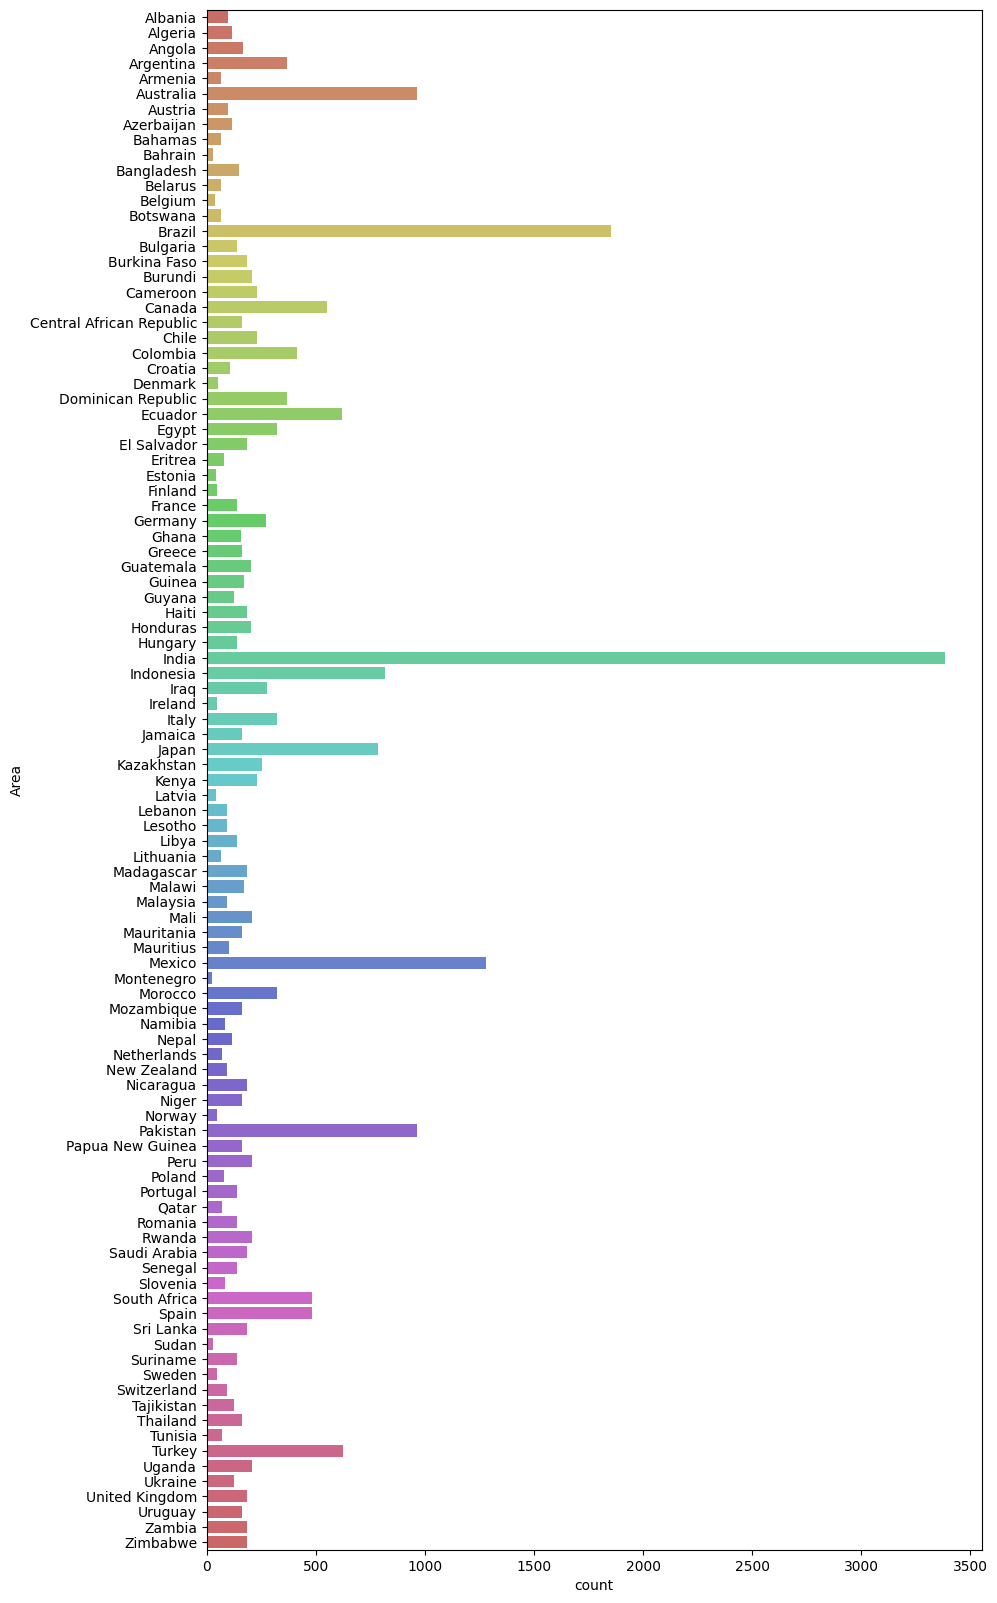

In [ ]:
plt.figure(figsize=(10, 20))
sns.countplot(y=df['Area'],palette='hls')

/tmp/ipython-input-3414121107.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Item'],palette='hls')


<Axes: xlabel='count', ylabel='Item'>

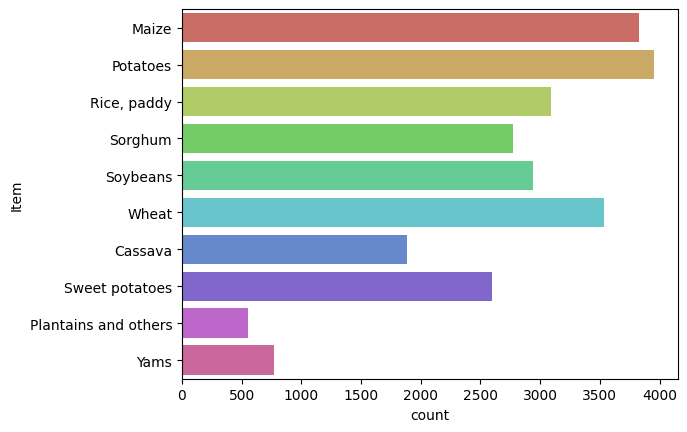

In [ ]:
sns.countplot(y=df['Item'],palette='hls')

In [ ]:
yeild_per_area=df.groupby('Area')['hg/ha_yield'].sum().to_frame()
yeild_per_area

,hg/ha_yield
Area,
Albania,5711536
Algeria,6711464
Angola,5722563
Argentina,32864032
Armenia,4524100
...,...
Ukraine,5496901
United Kingdom,44335992
Uruguay,9539820


In [ ]:
X=df.drop(['hg/ha_yield'],axis=1)
Y=df['hg/ha_yield']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [ ]:
ohe=OneHotEncoder()
stdsc=StandardScaler()

In [ ]:
X_train.head(1)

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
19647,Mexico,Sorghum,2000,758.0,34468.93,16.11


In [ ]:
preprocesser=ColumnTransformer(
    [
        ('Onehotencoder',ohe,[0,1]),
        ('Standeredization',stdsc,[3,4,5])
    ],
    remainder='passthrough'
)
preprocesser

ColumnTransformer(remainder='passthrough',
                  transformers=[('Onehotencoder', OneHotEncoder(), [0, 1]),
                                ('Standeredization', StandardScaler(),
                                 [3, 4, 5])])

In [ ]:
X_train_dummy=preprocesser.fit_transform(X_train)
X_test_dummy=preprocesser.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
lnrmodels={
    'lr':LinearRegression(),
    'ridge':Ridge(),
    'lasso':Lasso(),
    'dtr':DecisionTreeRegressor(),
    'knn':KNeighborsRegressor(),
}

In [ ]:
for name , model in lnrmodels.items():
    model.fit(X_train_dummy,Y_train)
    y_pred=model.predict(X_test_dummy)
    print(f"{name} :R2 score= {r2_score(Y_test,y_pred)*100}, MSE={mean_absolute_error(Y_test,y_pred)}")

lr :R2 score= 74.42622716562259, MSE=29118.549610051814
ridge :R2 score= 74.43390033731, MSE=29079.085133213033
lasso :R2 score= 74.4282504587493, MSE=29100.601462863815
dtr :R2 score= 97.72700236383223, MSE=3901.4181607865817
knn :R2 score= 83.82126167669371, MSE=16853.79228841334


In [ ]:
Knnr=KNeighborsRegressor()
Knnr.fit(X_train_dummy,Y_train)
y_pred=Knnr.predict(X_test_dummy)

In [ ]:
y_pred

array([64526.2, 17115.4, 35878. , ..., 24333. , 62360. , 10415. ])

In [ ]:
def predict_yield(Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp):
    data=preprocesser.transform([[Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp]])
    return Knnr.predict(data)[0]

In [ ]:
df.head(1)

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37


In [ ]:
Area="Mexico"
Item="Sorghum"
Year=2000
average_rain_fall_mm_per_year=758.0
pesticides_tonnes=34468.93
avg_temp=16.11
result=predict_yield(Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp)
print(result)

30762.0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
pickle.dump(preprocesser,open('preprocesser.pkl','wb'))
pickle.dump(Knnr,open('Knnr.pkl','wb'))